In [278]:
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,seaborn,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Ethen 2019-05-28 16:58:14 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.0
pandas 0.23.4
seaborn 0.9.0
matplotlib 2.2.3


In [270]:
df = pd.read_csv("E:\\online_retail.csv")

print(df.isna().sum())
df = df.dropna(subset=["CustomerID"])

InvoiceNo          0
StockCode          0
Description      901
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67225
Country            0
dtype: int64


<h1 style="text-align:center;">Top 10 most paying customers (all time)</h1>

In [271]:
df_sum_by_cutomer = df[["CustomerID", "Quantity", "UnitPrice"]]
df_sum_by_cutomer["Total"] = df_sum_by_cutomer["Quantity"] * df_sum_by_cutomer["UnitPrice"]
df_sum_by_cutomer = df_sum_by_cutomer.groupby(["CustomerID"]).sum()
df_sum_by_cutomer.sort_values(by=["Total"], ascending=False).head(10)

,Quantity,UnitPrice,Total
CustomerID,,,
14646.0,86408,2144.63,121928.65
18102.0,24020,836.10,106443.34
12415.0,47110,1397.75,73717.01
17450.0,23026,2088.64,59462.34
14156.0,23867,2523.74,48281.03
14911.0,22433,15309.92,42460.13
17511.0,27758,1287.44,39867.96
15311.0,23083,3496.23,35582.21
15061.0,16516,644.01,31974.04


<h1 style="text-align:center;">By country</h1>

In [272]:
df_sum_by_country = df[["Country", "Quantity", "UnitPrice"]]

df_sum_by_country["Total"] = df_sum_by_country["Quantity"] * df_sum_by_country["UnitPrice"]
df_sum_by_country = df_sum_by_country.groupby(["Country"]).sum()
df_sum_by_country.sort_values(by=["Total"], ascending=False).head(5)

,Quantity,UnitPrice,Total
Country,,,
United Kingdom,1710195,549675.311,2936812.091
Netherlands,88842,2877.440,125721.310
Germany,52566,15538.190,103525.900
EIRE,47728,18322.200,94105.790
France,49179,14620.330,87173.440


In [273]:
df["InvoiceMonth"] = pd.to_datetime(df["InvoiceDate"]).apply(
    lambda x: datetime.datetime(x.year, x.month, 1))

df["CohortMonth"] = df.groupby(["CustomerID"])["InvoiceMonth"].transform("min")

df["CohortIndex"] = \
    (df["InvoiceMonth"].dt.year - df["CohortMonth"].dt.year) * 12 \
    + (df["InvoiceMonth"].dt.month - df["CohortMonth"].dt.month) + 1

In [274]:
cohort_data = df.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].apply(pd.Series.nunique).reset_index()

cohort_count = cohort_data.pivot_table(index="CohortMonth", columns="CohortIndex", values="CustomerID")

CohortIndex,1,2,3,4,5,6,7
CohortMonth,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,319.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,115.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,89.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,87.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,64.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,60.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,NaN,NaN,NaN,NaN,NaN,NaN


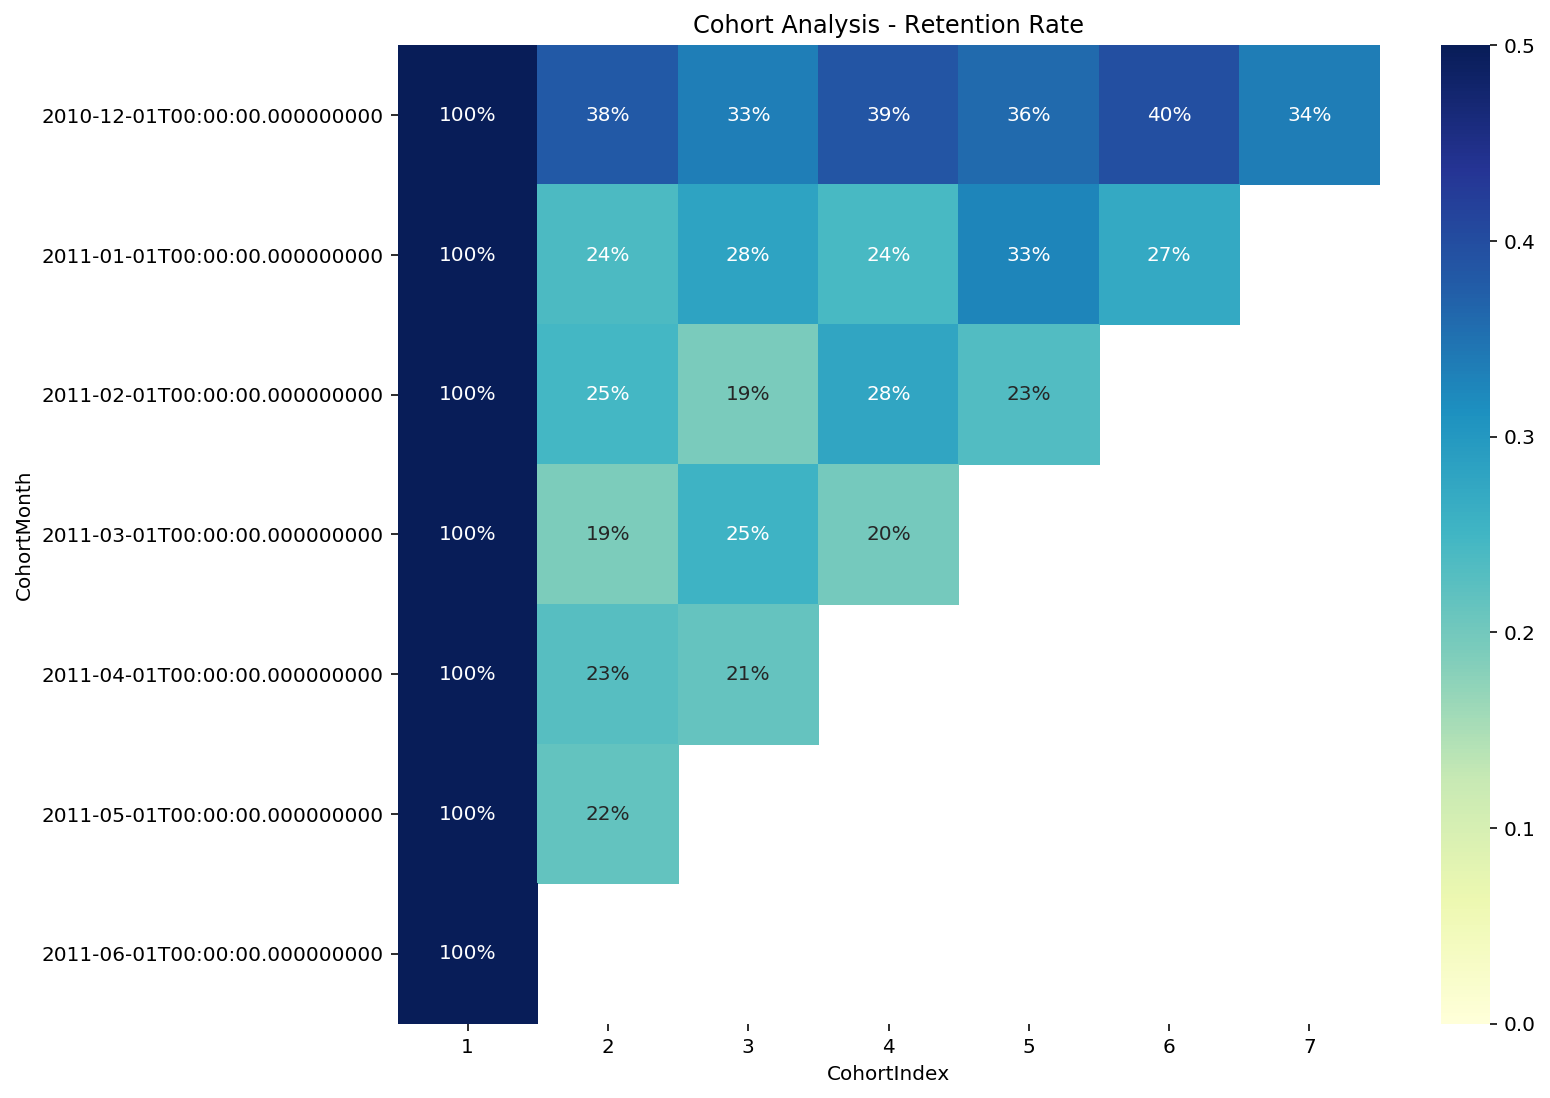

CohortMonth
2010-12-01    948.0
2011-01-01    421.0
2011-02-01    380.0
2011-03-01    440.0
2011-04-01    299.0
2011-05-01    279.0
2011-06-01    207.0
Name: 1, dtype: float64

In [282]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()
cohort_size